### Importing various modules

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api
from patsy import dmatrices
import statsmodels.formula.api as smf
import pandas_profiling
%matplotlib inline

In [116]:
hr=pd.read_csv('D:/Big data/14-15/Logistic Regression/2. Case Study - HR Analytics/HR_comma_sep.csv')

## Data Dictionary

satisfaction_level: Employee satisfaction level
last_evaluation: Last evaluation
number_project: Number of projects
average_montly_hours: Average monthly hours
time_spend_company: Time spent at the company
Work_accident: Whether they have had a work accident
promotion_last_5years: Whether they have had a promotion in the last 5 years
department: Department
salary: Salary
left: Whether the employee has left

In [117]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [118]:
hr[hr.isnull()].count().sum()

0

In [7]:
pandas_profiling.ProfileReport(hr)

Number of variables,10
Number of observations,14999
Total Missing (%),0.0%
Total size in memory,1.1 MiB
Average record size in memory,80.0 B
Numeric,8
Categorical,2
Date,0
Text (Unique),0
Rejected,0
Distinct count,2


There are no missings

In [119]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


# Visualization

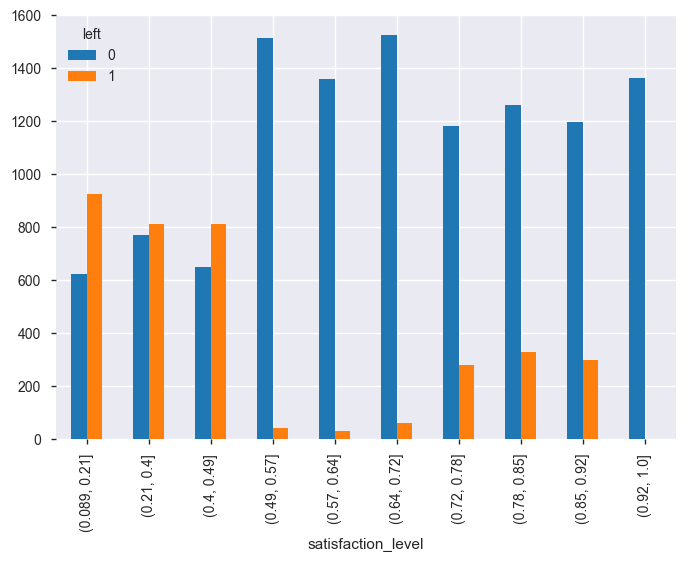

In [98]:
pd.crosstab(pd.qcut(hr.satisfaction_level,10),hr.left).plot(kind='bar')

Left shows high dependence on Satisfaction level 

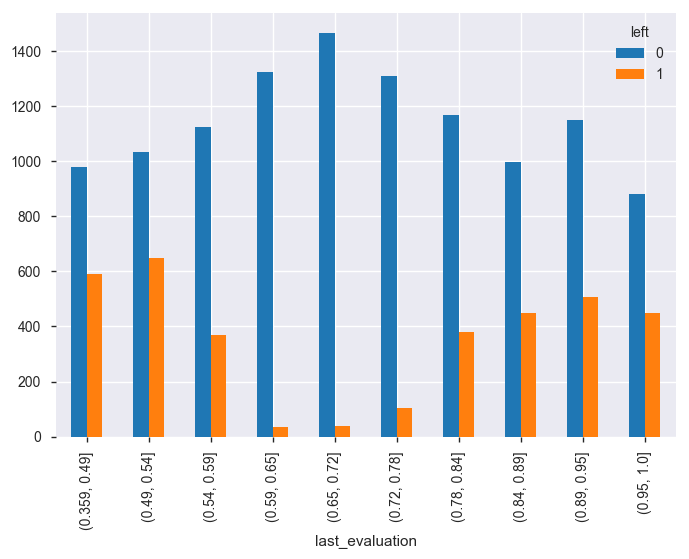

In [100]:
pd.crosstab(pd.qcut(hr.last_evaluation,10),hr.left).plot(kind='bar')

Here we see that proportion of left is low when evaluation score is high

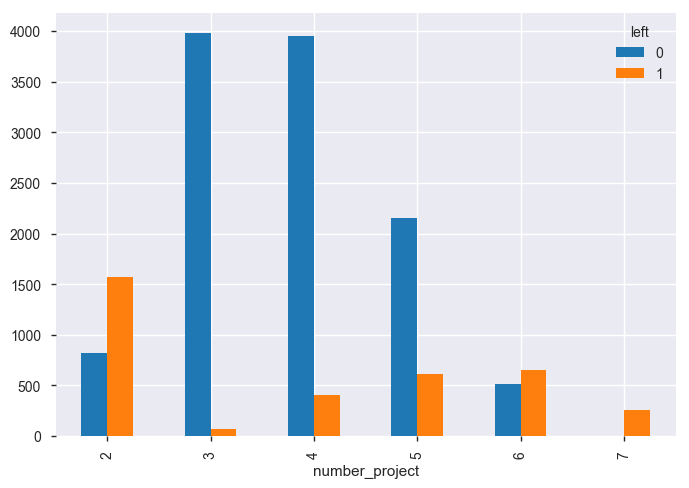

In [102]:
pd.crosstab(hr.number_project,hr.left).plot(kind='bar')

There is some dependency on number_project.

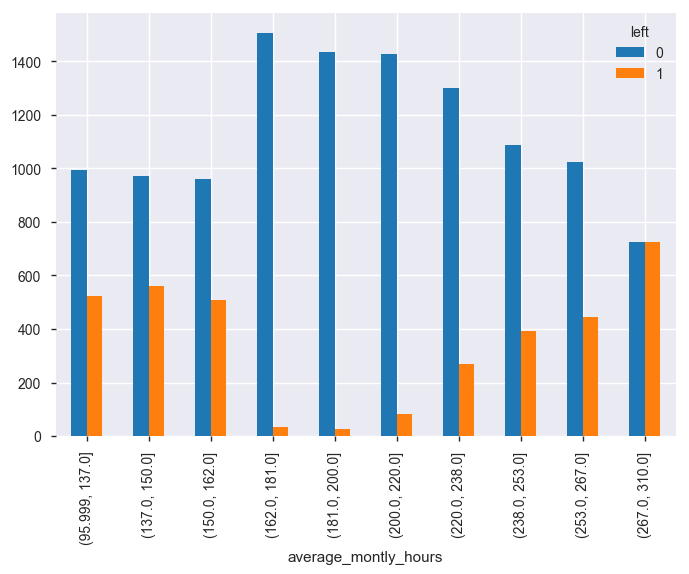

In [103]:
pd.crosstab(pd.qcut(hr.average_montly_hours,10),hr.left).plot(kind='bar')

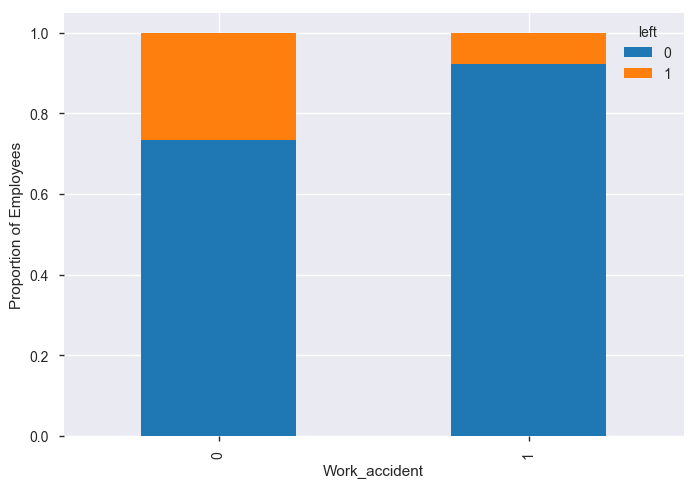

In [114]:
table=pd.crosstab(hr.Work_accident,hr.left)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.ylabel('Proportion of Employees')

Not much dependency observed except that we see that those employees who had 1 work accident have a lower proportion of people who left

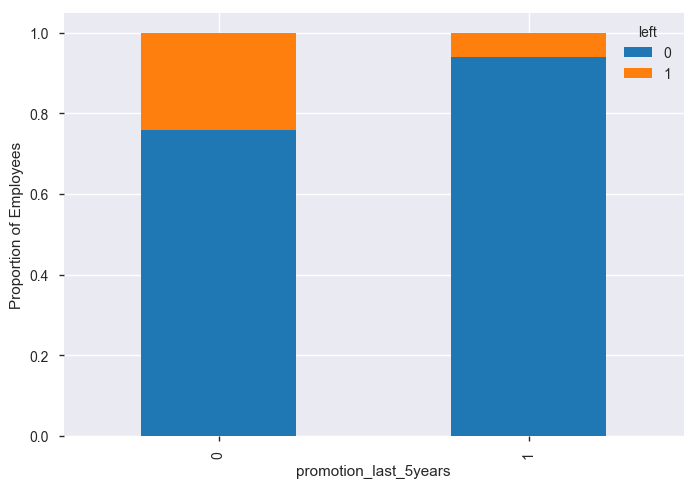

In [115]:
table=pd.crosstab(hr.promotion_last_5years,hr.left)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.ylabel('Proportion of Employees')

Employees having 1 promotion have less proportion of employees who left

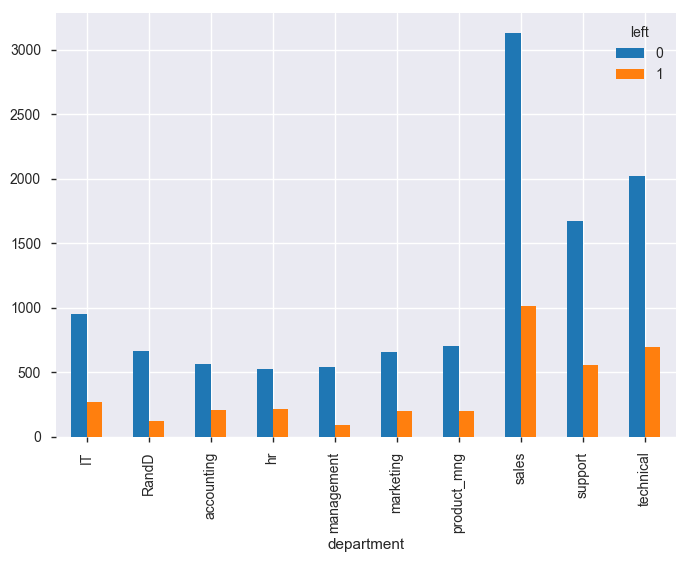

In [120]:
pd.crosstab(hr.department,hr.left).plot(kind='bar')

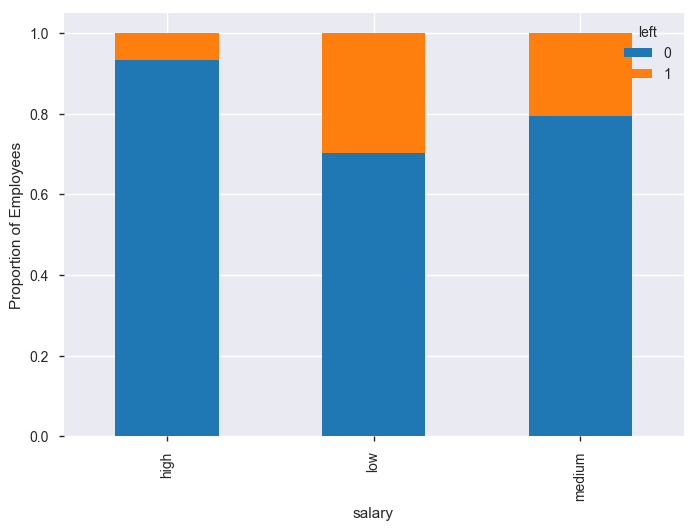

In [122]:
table=pd.crosstab(hr.salary,hr.left)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.ylabel('Proportion of Employees')

High salary employees have a low proportion of left, medium salary employees have a higher proportion of left and low salary employees have the highest proportion of people leaving  

## Creating Dummies for categorical variables

In [124]:
dummies=pd.get_dummies(hr.department,prefix='Dept')
hr.drop('department',axis=1,inplace=True)
hr=pd.concat([hr,dummies],axis=1)
hr=pd.concat([hr,pd.get_dummies(hr.salary,prefix='Salary')],axis=1)
hr.drop('salary',axis=1,inplace=True)
hr.drop(['Dept_IT','Salary_low'],axis=1,inplace=True)

In [125]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,Dept_RandD,Dept_accounting,Dept_hr,Dept_management,Dept_marketing,Dept_product_mng,Dept_sales,Dept_support,Dept_technical,Salary_high,Salary_medium
0,0.38,0.53,2,157,3,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0.37,0.52,2,159,3,0,0,1,0,0,0,0,0,0,1,0,0,0,0


## Creating a function to give summary of variables

In [126]:
hr_numerical=hr.select_dtypes(exclude=['object'])
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])
summary=hr_numerical.apply(lambda x: var_summary(x)).T
summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
satisfaction_level,14999.0,0.0,9191.89,0.612834,0.64,0.248631,0.061817,0.09,0.09,0.11,0.21,0.44,0.64,0.82,0.92,0.96,0.99,1.0
last_evaluation,14999.0,0.0,10740.81,0.716102,0.72,0.171169,0.029299,0.36,0.39,0.46,0.49,0.56,0.72,0.87,0.95,0.98,1.00,1.0
number_project,14999.0,0.0,57042.00,3.803054,4.00,1.232592,1.519284,2.00,2.00,2.00,2.00,3.00,4.00,5.00,5.00,6.00,7.00,7.0
average_montly_hours,14999.0,0.0,3015554.00,201.050337,200.00,49.943099,2494.313175,96.00,104.00,130.00,137.00,156.00,200.00,245.00,267.00,275.00,301.00,310.0
time_spend_company,14999.0,0.0,52470.00,3.498233,3.00,1.460136,2.131998,2.00,2.00,2.00,2.00,3.00,3.00,4.00,5.00,6.00,10.00,10.0
Work_accident,14999.0,0.0,2169.00,0.144610,0.00,0.351719,0.123706,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.0
promotion_last_5years,14999.0,0.0,319.00,0.021268,0.00,0.144281,0.020817,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.0
left,14999.0,0.0,3571.00,0.238083,0.00,0.425924,0.181411,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.0
Dept_RandD,14999.0,0.0,787.00,0.052470,0.00,0.222981,0.049720,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.0
Dept_accounting,14999.0,0.0,767.00,0.051137,0.00,0.220284,0.048525,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.0


## Generating correlation  matrix to check correlations and visualizing through heatmap

In [127]:
hr.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,Dept_RandD,Dept_accounting,Dept_hr,Dept_management,Dept_marketing,Dept_product_mng,Dept_sales,Dept_support,Dept_technical,Salary_high,Salary_medium
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605,-0.388375,0.006615,-0.028649,-0.012841,0.007172,0.005715,0.006919,0.004007,0.009185,-0.009345,0.029708,0.031367
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684,0.006567,-0.005471,0.002193,-0.009645,0.009662,-0.000311,-0.001989,-0.023031,0.017104,0.013742,-0.020628,0.006191
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064,0.023787,0.009703,0.004189,-0.027356,0.009728,-0.023064,0.000829,-0.013388,0.000303,0.028596,-0.008726,0.007377
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544,0.071287,-0.001177,0.000524,-0.010783,0.000834,-0.008210,-0.005494,-0.001718,-0.002444,0.013638,-0.007101,0.005007
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433,0.144822,-0.021116,0.003909,-0.022194,0.115436,0.012096,-0.003919,0.015150,-0.030111,-0.027991,0.039953,0.018299
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245,-0.154622,0.017167,-0.012836,-0.015649,0.011242,0.011367,0.001246,-0.004955,0.012079,-0.006070,0.009040,0.001856
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000,-0.061788,0.021268,-0.004852,-0.001531,0.128087,0.049253,-0.037288,0.012353,-0.035605,-0.035799,0.076756,0.040985
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788,1.000000,-0.046596,0.015201,0.028249,-0.046035,-0.000859,-0.011029,0.009923,0.010700,0.020076,-0.120929,-0.068833
Dept_RandD,0.006615,-0.005471,0.009703,-0.001177,-0.021116,0.017167,0.021268,-0.046596,1.000000,-0.054629,-0.053570,-0.049274,-0.057965,-0.059525,-0.145300,-0.098315,-0.110755,-0.015115,0.020402
Dept_accounting,-0.028649,0.002193,0.004189,0.000524,0.003909,-0.012836,-0.004852,0.015201,-0.054629,1.000000,-0.052848,-0.048610,-0.057183,-0.058723,-0.143341,-0.096989,-0.109262,0.011821,0.003285


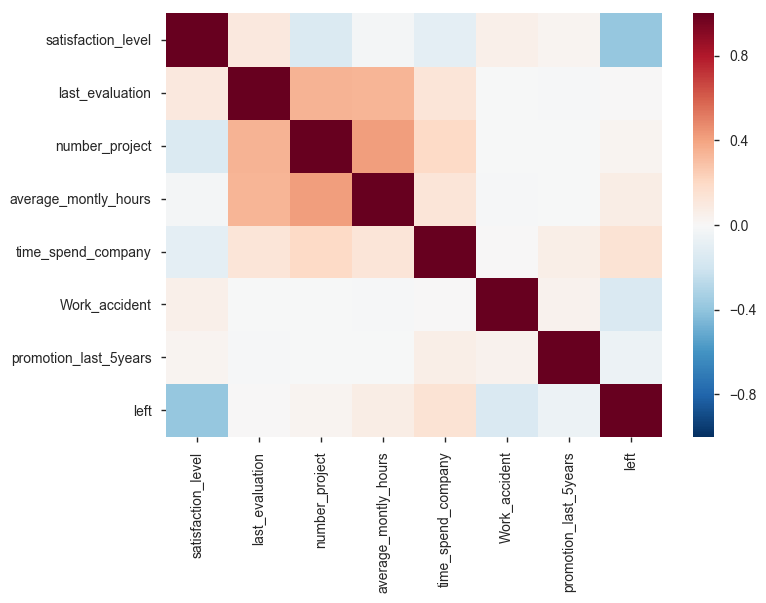

In [31]:
sns.heatmap(hr.corr())

## Generating VIF matrix to check multicolinearity

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [130]:
features = "+".join(hr.columns.difference(["left"]))

# get y and X dataframes based on this regression:
y, X = dmatrices('left~'+features,data=hr,return_type="dataframe")

In [131]:
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["Feature"]=X.columns
vif

,vif,Feature
0,48.004038,Intercept
1,1.558990,Dept_RandD
2,1.544367,Dept_accounting
3,1.526138,Dept_hr
4,1.527780,Dept_management
5,1.609633,Dept_marketing
6,1.631064,Dept_product_mng
7,3.172583,Dept_sales
8,2.399783,Dept_support
9,2.635243,Dept_technical


VIF is low for all the variables so multicolinearity is low

In [132]:
X.head()


,Intercept,Dept_RandD,Dept_accounting,Dept_hr,Dept_management,Dept_marketing,Dept_product_mng,Dept_sales,Dept_support,Dept_technical,Salary_high,Salary_medium,Work_accident,average_montly_hours,last_evaluation,number_project,promotion_last_5years,satisfaction_level,time_spend_company
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,157.0,0.53,2.0,0.0,0.38,3.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,262.0,0.86,5.0,0.0,0.80,6.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,272.0,0.88,7.0,0.0,0.11,4.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,223.0,0.87,5.0,0.0,0.72,5.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,159.0,0.52,2.0,0.0,0.37,3.0


In [133]:
from sklearn.cross_validation import train_test_split
train,test=train_test_split(hr,test_size=0.3,random_state=123)

In [134]:
print('Train size:'+str(train.shape[0]))
print('Test size:'+str(test.shape[0]))      

Train size:10499
Test size:4500


In [135]:
train.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,Dept_RandD,Dept_accounting,Dept_hr,Dept_management,Dept_marketing,Dept_product_mng,Dept_sales,Dept_support,Dept_technical,Salary_high,Salary_medium
5242,0.76,0.47,3,223,2,0,0,0,0,0,0,0,0,0,0,1,0,0,1
12674,0.46,0.50,2,157,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6924,0.36,0.93,3,162,5,0,0,0,0,0,0,0,0,0,0,1,0,0,0
12595,0.09,0.87,5,263,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0
13482,0.58,0.59,3,207,7,0,1,0,0,0,0,1,0,0,0,0,0,0,1


In [136]:
test.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,Dept_RandD,Dept_accounting,Dept_hr,Dept_management,Dept_marketing,Dept_product_mng,Dept_sales,Dept_support,Dept_technical,Salary_high,Salary_medium
6958,0.54,0.67,3,154,2,0,0,0,0,0,0,0,0,0,1,0,0,1,0
7534,0.72,0.52,3,143,4,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2975,0.95,0.61,3,267,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3903,0.78,0.79,3,203,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8437,0.60,0.40,3,146,4,1,0,0,0,0,0,0,0,0,0,0,1,0,0


# Model Building

In [137]:
logistic=smf.logit(formula='left~'+features,data=train)
result=logistic.fit()
summ=result.summary()

Optimization terminated successfully.
         Current function value: 0.427312
         Iterations 7


In [138]:
summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   left   No. Observations:                10499
Model:                          Logit   Df Residuals:                    10480
Method:                           MLE   Df Model:                           18
Date:                Thu, 11 Jan 2018   Pseudo R-squ.:                  0.2215
Time:                        15:23:35   Log-Likelihood:                -4486.4
converged:                       True   LL-Null:                       -5762.9
                                        LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.1748      0.169      1.033      0.302      -0.157       0.507
Dept_RandD               -0.3870      0.163     -2.381      0.017      -0.706      -0.068
Dept_accounting           0.2392      0.149      1.607      0.108      -0.052       0.531
Dept_hr                   0.4396      0.144      3.049      0.002       0.157       0.722
Dept_management          -0.3569      0.184     -1.943      0.052      -0.717       0.003
Dept_marketing            0.1928      0.146      1.325      0.185      -0.093       0.478
Dept_product_mng         -0.0029      0.146     -0.020      0.984      -0.288       0.282
Dept_sales                0.1598      0.107      1.494      0.135      -0.050       0.369
Dept_support              0.1978      0.116      1.699      0.089      -0.030       0.426
Dept_technical            0.2812      0.113      2.494      0.013       0.060       0.502
Salary_high              -1.9102      0.157    -12.155      0.000      -2.218      -1.602
Salary_medium            -0.5322      0.055     -9.725      0.000      -0.639      -0.425
Work_accident            -1.5695      0.109    -14.460      0.000      -1.782      -1.357
average_montly_hours      0.0044      0.001      7.136      0.000       0.003       0.006
last_evaluation           0.9365      0.178      5.265      0.000       0.588       1.285
number_project           -0.3177      0.025    -12.493      0.000      -0.368      -0.268
promotion_last_5years    -1.2618      0.301     -4.198      0.000      -1.851      -0.673
satisfaction_level       -4.1479      0.117    -35.389      0.000      -4.378      -3.918
time_spend_company        0.2636      0.018     14.345      0.000       0.228       0.300
=========================================================================================
"""

In [139]:
from sklearn import metrics

In [140]:
train_gini = 2*metrics.roc_auc_score(train.left, result.predict()) - 1
print("The Gini Index for the model built on the Train Data is : "+str( train_gini))

test_gini = 2*metrics.roc_auc_score(test.left, result.predict(test)) - 1
print("The Gini Index for the model built on the Test Data is : "+ str(test_gini))


The Gini Index for the model built on the Train Data is : 0.645461882735
The Gini Index for the model built on the Test Data is : 0.639229192212


Gini for train and test data is similar and value is high too => Model is good  

In [141]:
import numpy as np

In [142]:
final_train=pd.DataFrame()
final_train['Actual']=train.left
final_train['Prob']=result.predict()


In [143]:
roc_table=pd.DataFrame()
temp=final_train.copy()
for cutoff in np.linspace(0,1,50):
    temp['Pred']=temp.Prob.apply(lambda x:0 if x<cutoff else 1)
    temp['TruePositive']=temp.apply(lambda x:1 if x['Actual']==1 and x['Pred']==1 else 0,axis=1 )
    temp['TrueNegative']=temp.apply(lambda x:1 if x['Actual']==0 and x['Pred']==0 else 0,axis=1 )
    roc_table_temp=pd.DataFrame([[cutoff,temp.TruePositive.sum()/temp.Actual.sum(),temp.TrueNegative.sum()/temp.Actual[temp.Actual==0].count()]],columns=['cutoff','sensitivity','specificity'])
    roc_table=pd.concat([roc_table,roc_table_temp],axis=0,ignore_index=True)

In [144]:
roc_table['total']=roc_table.sensitivity+roc_table.specificity

In [145]:
roc_table.head(10)

,cutoff,sensitivity,specificity,total
0,0.000000,1.0000,0.000000,1.000000
1,0.020408,0.9984,0.079010,1.077410
2,0.040816,0.9876,0.174272,1.161872
3,0.061224,0.9756,0.274409,1.250009
4,0.081633,0.9712,0.364546,1.335746
5,0.102041,0.9576,0.441555,1.399155
6,0.122449,0.9316,0.501063,1.432663
7,0.142857,0.9012,0.557195,1.458395
8,0.163265,0.8660,0.604701,1.470701
9,0.183673,0.8360,0.647956,1.483956


## Choosing a cut off for which sensitivity and specificity is high

In [146]:
roc_table[roc_table.total==roc_table.total.max()]

,cutoff,sensitivity,specificity,total
12,0.244898,0.758,0.746718,1.504718


In [147]:
finalcutoff=0.244898

In [148]:
final_train['Pred']=final.apply(lambda x:1 if x['Prob']>finalcutoff else 0,axis=1)

In [150]:
final_train.head(10)

,Actual,Prob,Pred
5242,0,0.090148,0
12674,1,0.397624,1
6924,0,0.696674,1
12595,1,0.776441,1
13482,0,0.116921,0
2336,0,0.238444,0
11730,0,0.091643,0
14720,1,0.552902,1
10323,0,0.022146,0
3817,0,0.292214,1


In [151]:
print("The overall accuracy score for the Train Data is : "+str( metrics.accuracy_score(final.Actual,final.Pred)))

The overall accuracy score for the Train Data is : 0.74940470521


# The accuracy for our model for training dataset is 74.9%  

In [152]:
final_test=pd.DataFrame()
final_test['Actual']=test.left
final_test['Prob']=result.predict(test)
final_test['Pred']=final_test.apply(lambda x:1 if x.Prob>finalcutoff else 0,axis=1)

In [153]:
final_test

,Actual,Prob,Pred
6958,0,0.050545,0
7534,0,0.049135,0
2975,0,0.055892,0
3903,0,0.155866,0
8437,0,0.077220,0
6812,0,0.116726,0
1567,1,0.496359,1
14679,1,0.151338,0
10188,0,0.096915,0
11718,0,0.009589,0


In [154]:
print("The overall accuracy score for the Test Data is : "+str( metrics.accuracy_score(final_test.Actual,final_test.Pred)))

The overall accuracy score for the Test Data is : 0.745555555556


# Accuracy for testing data is 74.55%. Model is working well with test data